# Load Libraries (to make life easier)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
# Load Data (I put it in github)
df = pd.read_csv('https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/main/Predictions/Data/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


# See Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


The Column `Extracurricular Activities` is an Object Data type. We need to change it into a numerical through encoding.

In [5]:
# See the values
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
# Encode the Extracurricular Activities Column
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Extracurricular Activities'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


And now they're all numerical data types.

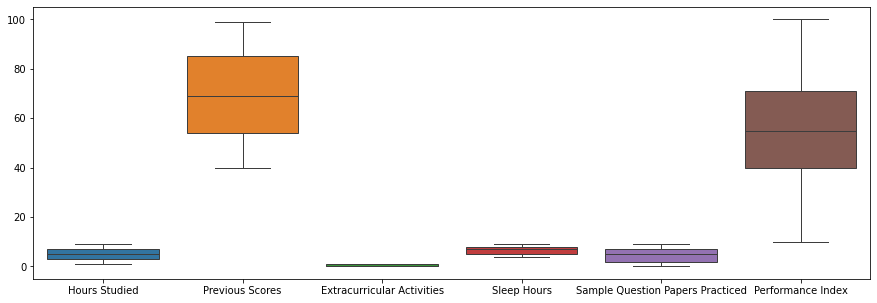

In [7]:
# Attempt to see outliers through boxplots
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.show()

Data looks clean with no apparent outliers. Next, let's try to do a visual inspection of Linearity.
To do that, We can plot every column against the target column, `Performance Index`.

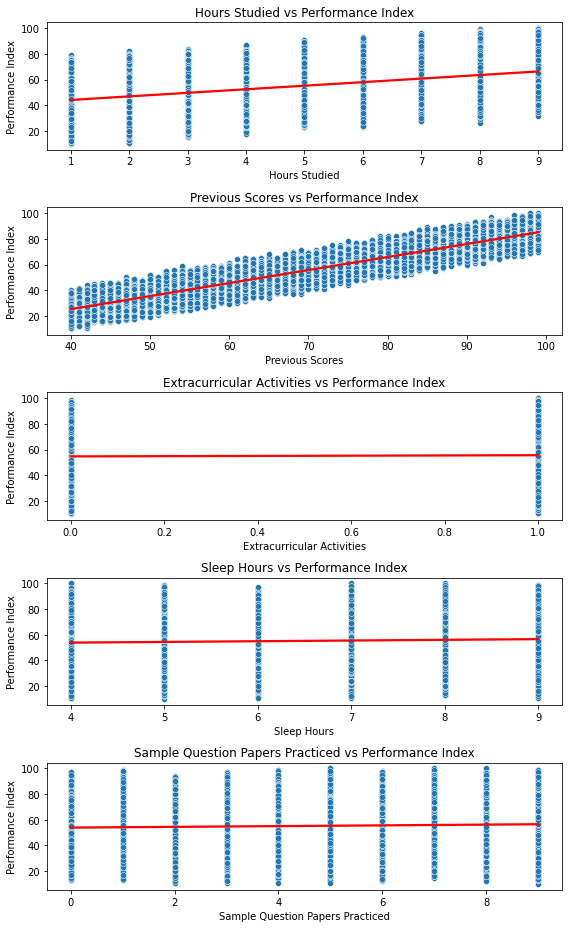

In [8]:
# Features and target
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(8, 13))

# Iterate over each feature
for i, feature in enumerate(features):
    # Scatter plot
    sns.scatterplot(x=df[feature], y=df['Performance Index'], ax=axs[i])
    
    # Linear regression line
    sns.regplot(x=df[feature], y=df['Performance Index'], scatter=False, color='red', ax=axs[i])
    
    # Add title
    axs[i].set_title(f'{feature} vs Performance Index')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

From visual inspection only, we can see from the lines that `Hours Studied` and `Previous Scores` are the two features that visually has the most obvious Linearity Relationship against `Performance Index`. We can expect the two features to be important in determining the predicted value.

# Running (Multiple) Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# Define features and target
X = df[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Run model
predictions = model.predict(X_test)

In [14]:
# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Add the intercept to the DataFrame
intercept_df = pd.DataFrame({
    'Feature': ['Intercept'],
    'Coefficient': [model.intercept_]
})

# Combine both DataFrames
coef_df = pd.concat([intercept_df, coef_df], ignore_index=True)
coef_df

,Feature,Coefficient
0,Intercept,-33.921946
1,Hours Studied,2.852484
2,Previous Scores,1.016988
3,Extracurricular Activities,0.608617
4,Sleep Hours,0.476941
5,Sample Question Papers Practiced,0.191831


Based on the coefficients (which reflect the influence of each feature on the target variable) shown in the table above, our observations align with expectations from previous visualizations. Notably, `Hours Studied` and `Previous Scores` stand out with the highest coefficients among all features.

In [15]:
# Linear Regression Metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 4.082628398521853
R^2 Score: 0.9889832909573145


## From Results Above, The Formula Can be Put Together As Follows:
**Performance Index** = -33.92 + (2.85 x Hours Studied) + (1.01 x Previous Scores) + (0.60 x Extracurricular Activities) + (0.47 x Sleep Hours) + (0.19 x Sample Question Papers Practiced)

## Metrics Interpretation
- On average, the predicted Performance Index values from the model are about 4.08 units squared away from the actual Performance Index values.
- About 98.9% of the variance in the Performance Index can be explained by the independent variables included in your model. This indicates a very strong fit of the model to the data.